## Setting up the environment for Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive/Colab Notebooks/w266_final/project_re"

/content/drive/.shortcut-targets-by-id/1I3W7Z7rz_YfsjBjX7z4zTzGbr-iKTrmD/w266_final/project_re


In [3]:
%reload_ext autoreload
%autoreload
import pickle, os, json
import torch
from pathlib import Path, PureWindowsPath, PurePosixPath
from util.tools import load_config
import pandas as pd

In [4]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [5]:
config_folder = "config/"
config = load_config(config_folder)

In [6]:
reports_folder_name = config.programsettings.REPORTS_DIR
data_folder = Path(reports_folder_name)
list_results_files = list(data_folder.glob('**/test_results*.pkl'))

all_results = []
for results_file in list_results_files:
    print(results_file)
    with open(results_file,"rb") as f:
        lst_results = pickle.load(f)
    for results in lst_results:
        all_results.append([results_file, results[0], results[1], results[2], results[3] ])

columns = ['file_name','model_name','Predicted', 'True', 'input']
pd.options.display.max_colwidth = 250
df_results = pd.DataFrame(all_results, columns = columns)
df_results


reports/re/test_results_2020-11-23 05_55_31_646110.pkl
reports/re/test_results_2020-11-23 06_16_56_819055.pkl
reports/re/test_results_2020-11-23 07_17_45_101072.pkl
reports/re/test_results_2020-11-23 06_01_19_939455.pkl
reports/re/test_results_2020-11-23 05_49_44_036175.pkl
reports/re/test_results_2020-11-23 06_52_55_145775.pkl
reports/re/test_results_2020-11-23 06_37_45_563271.pkl
reports/re/test_results_2020-11-23 07_12_46_821315.pkl
reports/re/test_results_2020-11-23 06_06_32_040659.pkl
reports/re/test_results_2020-11-23 06_32_33_314245.pkl
reports/re/test_results_2020-11-23 06_57_53_117925.pkl
reports/re/test_results_2020-11-23 05_43_56_151740.pkl
reports/re/test_results_2020-11-23 07_07_48_929393.pkl
reports/re/test_results_2020-11-23 07_02_51_012135.pkl
reports/re/test_results_2020-11-23 06_42_57_822165.pkl
reports/re/test_results_2020-11-23 06_11_44_159352.pkl
reports/re/test_results_2020-11-23 06_22_08_922387.pkl
reports/re/test_results_2020-11-23 06_47_57_231734.pkl
reports/re

,file_name,model_name,Predicted,True,input
0,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,1,5,[CLS] 12 . O ##B ##J _ B i ##pra ##tro ##pi ##um br ##omi ##de O ##B ##J _ E 0 . 02 % Sol ##ution Si ##g : One ( 1 ) S ##U ##B _ B in ##hala ##tion S ##U ##B _ E In ##hala ##tion Q ##6 ##H ( every 6 hours ) . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [...
1,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,2,6,[CLS] She underwent ad ##ju ##vant ch ##em ##otherapy after completion of surgery with Ad ##ria ##my ##cin and Cy ##to ##xa ##n followed by S ##U ##B _ B 10 S ##U ##B _ E weekly doses of O ##B ##J _ B Tax ##ol O ##B ##J _ E . [SEP] [PAD] [PAD] [P...
2,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,7,0,"[CLS] Pat ##ient however continued to de ##ter ##ior ##ate and abruptly became profound ##ly S ##U ##B _ B bra ##dy ##card ##ic S ##U ##B _ E , un ##res ##po ##ns ##ive to at ##rop ##ine or increasing doses of O ##B ##J _ B press ##ors O ##B ##J ..."
3,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,0,7,[CLS] Follow - up CT torso was obtained on [ * * 8 - 1 * * ] due to S ##U ##B _ B persistent fever ##s S ##U ##B _ E on c ##ef ##ep ##ime and O ##B ##J _ B van ##c O ##B ##J _ E ; finding were stable to previous imaging and c ##ef ##ep ##ime was ...
4,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,0,7,"[CLS] She had fever ##s , weakness , and S ##U ##B _ B di ##ar ##r ##hea S ##U ##B _ E . Ad ##mission Date : [ * * 210 ##9 - 7 - 21 * * ] Disc ##har ##ge Date : [ * * 210 ##9 - 8 - 13 * * ] Date of Birth : [ * * 205 ##3 - 6 - 5 * * ] Sex : F Serv..."
...,...,...,...,...,...
14292,reports/re/test_results_2020-11-23 06_27_21_059745.pkl,outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin,2,8,[CLS] # Code : F ##U ##LL # Communication : With husband [ * * Name ( N ##I ) 401 * * ] ( [ * * Telephone / F ##ax ( 1 ) 239 ##46 * * ] ) and son [ * * Name ( N ##I ) 46 ##48 * * ] ( [ * * Telephone / F ##ax ( 1 ) 239 ##47 * * ] ) Me ##dication #...
14293,reports/re/test_results_2020-11-23 06_27_21_059745.pkl,outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin,0,7,"[CLS] S ##U ##B _ B Ana ##phy ##lax ##is S ##U ##B _ E : the p ##t had an ##aph ##yla ##ct ##oid reaction to IV O ##B ##J _ B contrast dye O ##B ##J _ E during CT as evidenced by acute onset of flush ##ing , per ##ior ##bit ##al / facial ed ##ema..."
14294,reports/re/test_results_2020-11-23 06_27_21_059745.pkl,outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin,1,5,"[CLS] Of note , her O ##B ##J _ B plate ##let O ##B ##J _ E count was improving already and did not require further O ##B ##J _ B plate ##let O ##B ##J _ E S ##U ##B _ B trans ##fusion ##s S ##U ##B _ E . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]..."
14295,reports/re/test_results_2020-11-23 06_27_21_059745.pkl,outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin,4,6,"[CLS] Re ##lap ##sed after initial therapy with S ##U ##B _ B 6 cycles S ##U ##B _ E of O ##B ##J _ B R - CH ##OP O ##B ##J _ E ( last treatment on [ * * 215 ##7 - 1 - 6 * * ] , v ##in ##c ##rist ##ine held secondary to peripheral ne ##uro ##path..."


In [7]:
df_results[ (df_results["True"] == 7) ]

,file_name,model_name,Predicted,True,input
3,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,0,7,[CLS] Follow - up CT torso was obtained on [ * * 8 - 1 * * ] due to S ##U ##B _ B persistent fever ##s S ##U ##B _ E on c ##ef ##ep ##ime and O ##B ##J _ B van ##c O ##B ##J _ E ; finding were stable to previous imaging and c ##ef ##ep ##ime was ...
4,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,0,7,"[CLS] She had fever ##s , weakness , and S ##U ##B _ B di ##ar ##r ##hea S ##U ##B _ E . Ad ##mission Date : [ * * 210 ##9 - 7 - 21 * * ] Disc ##har ##ge Date : [ * * 210 ##9 - 8 - 13 * * ] Date of Birth : [ * * 205 ##3 - 6 - 5 * * ] Sex : F Serv..."
7,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,0,7,[CLS] E ##K ##G should be checked if the patient receives O ##B ##J _ B ha ##ldo ##l O ##B ##J _ E on a regular basis ( risk for S ##U ##B _ B prolonged Q ##T S ##U ##B _ E ) . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA...
11,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,0,7,[CLS] # S ##U ##B _ B N ##eu ##tro ##pen ##ic fever S ##U ##B _ E : The patient finished her 5th day of O ##B ##J _ B de ##ci ##ta ##bine O ##B ##J _ E for MD ##S treatment on [ * * 9 - 12 * * ] . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [...
28,reports/re/test_results_2020-11-23 05_55_31_646110.pkl,outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin,0,7,[CLS] Other sources considered included line infections ( Right I ##J recently replaced in same site ) or S ##U ##B _ B C . di ##ff S ##U ##B _ E given prolonged O ##B ##J _ B AB ##X O ##B ##J _ E course . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD...
...,...,...,...,...,...
14251,reports/re/test_results_2020-11-23 06_27_21_059745.pkl,outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin,0,7,"[CLS] She was given m ##uc ##omy ##st for possible O ##B ##J _ B t ##yle ##no ##l O ##B ##J _ E S ##U ##B _ B O ##D S ##U ##B _ E , though O ##B ##J _ B t ##yle ##no ##l O ##B ##J _ E levels were found to be normal . [SEP] [PAD] [PAD] [PAD] [PAD]..."
14252,reports/re/test_results_2020-11-23 06_27_21_059745.pkl,outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin,0,7,"[CLS] Upon return to the floor , he received an additional dose of O ##B ##J _ B Ba ##ct ##rim O ##B ##J _ E - with re ##cu ##rrence of S ##U ##B _ B fever S ##U ##B _ E / ta ##chy ##card ##ia / h ##y ##pot ##ens ##ion , again requiring I ##CU st..."
14286,reports/re/test_results_2020-11-23 06_27_21_059745.pkl,outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin,3,7,[CLS] An S ##U ##B _ B AM co ##rt ##is ##ol was found to be elevated S ##U ##B _ E and resistant to su ##press ##ion by 1 ##m ##g O ##B ##J _ B de ##xa ##met ##has ##one O ##B ##J _ E overnight . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P...
14293,reports/re/test_results_2020-11-23 06_27_21_059745.pkl,outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin,0,7,"[CLS] S ##U ##B _ B Ana ##phy ##lax ##is S ##U ##B _ E : the p ##t had an ##aph ##yla ##ct ##oid reaction to IV O ##B ##J _ B contrast dye O ##B ##J _ E during CT as evidenced by acute onset of flush ##ing , per ##ior ##bit ##al / facial ed ##ema..."


In [8]:
df_results[ (df_results["True"] == 7) ].groupby("Predicted").count()['True']

Predicted
0    2300
1       4
3      16
4       2
5       3
8      74
Name: True, dtype: int64

In [9]:
df_results[ (df_results["True"] == 7) ].groupby("input").count().apply(lambda x: x.sort_values(ascending=False).head(20))

,file_name,model_name,Predicted,True
input,,,,
"[CLS] The patient has a history of S ##U ##B _ B co ##lit ##is S ##U ##B _ E with C ##ip ##ro ##f ##lo ##xa ##cin in the past per his mother , and O ##B ##J _ B Lev ##of ##lo ##xa ##cin O ##B ##J _ E was stopped on [ * * 4 - 1 * * ] , and A ##zi ##th ##rom ##y ##cin was started . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]",19,19,19,19
"[CLS] The patient was found to have S ##U ##B _ B acute re ##nal ins ##uff ##iciency S ##U ##B _ E by laboratories in clinic and was asked to come to the Emergency Department for further evaluation . The patient ' s di ##ure ##tics were recently increased prior to admission to Las ##ix 40 and O ##B ##J _ B Al ##da ##cton ##e O ##B ##J _ E 100 , but they were decreased to Las ##ix 20 and O ##B ##J _ B Al ##da ##cton ##e O ##B ##J _ E 50 for elevated c ##rea ##tin ##ines . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]",19,19,19,19
[CLS] An S ##U ##B _ B AM co ##rt ##is ##ol was found to be elevated S ##U ##B _ E and resistant to su ##press ##ion by 1 ##m ##g O ##B ##J _ B de ##xa ##met ##has ##one O ##B ##J _ E overnight . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

In [10]:
df_results[ (df_results["True"] == 7) ].groupby("model_name").count().apply(lambda x: x.sort_values(ascending=False).head(50))['Predicted']

model_name
outputs\re\BioBERT_fc2020-11-16 00_40_57_659995_bin       166
outputs\re\BERT_Sequence2020-11-16 22_21_41_536138_bin    150
outputs\re\BERT_Sequence2020-11-20 12_33_00_408665_bin    145
outputs\re\BioBERT_fc2020-11-16 20_17_53_374127_bin       138
outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin    137
outputs\re\BioBERT_fc2020-11-22 08_15_02_596134_bin       135
outputs\re\BioBERT_5epochs_bin                            131
outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin    130
outputs\re\BioBERT_fc2020-11-21 22_06_59_632738_bin       124
outputs\re\BioBERT_fc2020-11-22 10_36_33_240569_bin       122
outputs\re\BioBERT_fc2020-11-22 23_49_51_449255_bin       121
outputs\re\BioBERT_fc2020-11-22 01_29_37_863601_bin       119
outputs\re\BioBERT_fc2020-11-20 01_41_02_300023_bin       119
outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin       118
outputs\re\BioBERT_5epochs_256seq_bin                     112
outputs\re\BioBERT_fc2020-11-23 02_11_58_926877_bin       1

In [11]:
df_results[ (df_results["True"] == 7) & (df_results["model_name"] == 'outputs\\re\\BioBERT_CNN_fc2020-11-24 03_13_56_562308_bin')]["Predicted"].value_counts()

Series([], Name: Predicted, dtype: int64)

In [12]:
df_results[ (df_results["True"] == 7) ]["Predicted"].value_counts()

0    2300
8      74
3      16
1       4
5       3
4       2
Name: Predicted, dtype: int64

## Misclassification with model: sequence length 256, epochs 5, 1FC 

In [13]:
df_results[df_results['Predicted']==df_results['True']]

,file_name,model_name,Predicted,True,input


In [14]:
df_results['model_name'].value_counts()

outputs\re\BioBERT_fc2020-11-16 00_40_57_659995_bin       1012
outputs\re\BERT_Sequence2020-11-20 04_03_11_148846_bin     793
outputs\re\BERT_Sequence2020-11-16 22_21_41_536138_bin     789
outputs\re\BERT_Sequence2020-11-20 12_33_00_408665_bin     786
outputs\re\BERT_Sequence2020-11-16 05_43_28_786014_bin     773
outputs\re\BioBERT_fc2020-11-23 02_11_58_926877_bin        754
outputs\re\BioBERT_fc2020-11-22 01_29_37_863601_bin        753
outputs\re\BioBERT_fc2020-11-21 22_06_59_632738_bin        745
outputs\re\BioBERT_5epochs_256seq_bin                      730
outputs\re\BioBERT_fc2020-11-20 01_41_02_300023_bin        726
outputs\re\BioBERT_fc2020-11-16 20_17_53_374127_bin        725
outputs\re\BioBERT_fc2020-11-20 08_58_14_655591_bin        723
outputs\re\BioBERT_fc2020-11-16 03_37_07_579463_bin        720
outputs\re\BioBERT_fc2020-11-22 23_49_51_449255_bin        720
outputs\re\BioBERT_5epochs_bin                             716
outputs\re\BioBERT_fc2020-11-16 16_17_55_396529_bin    

In [15]:
misclass_m1 = df_results[(df_results['model_name'] == 'outputs\\re\\BioBERT_5epochs_256seq_bin')]

In [16]:
len(misclass_m1)

730

In [17]:
pd.set_option('display.max_colwidth', -1)
#misclass_ade_m1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [18]:
misclass_m1['cleaned_input'] = misclass_m1['input'].str.replace(' ##', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
misclass_m1['cleaned_input'] = misclass_m1['cleaned_input'].str.replace('\[PAD\]', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Calculate sequence length

In [20]:
misclass_m1['seq_length'] = misclass_m1['cleaned_input'].str.len()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
misclass_m1.head()

,file_name,model_name,Predicted,True,input,cleaned_input,seq_length
11391,reports/re/test_results_2020-11-23 06_11_44_159352.pkl,outputs\re\BioBERT_5epochs_256seq_bin,8,2,"[CLS] Relations ##hip : daughter Phone : [ * * Telephone / F ##ax ( 1 ) 243 ##12 * * ] Me ##dication ##s on Ad ##mission : Ali ##ski ##ren * N ##F * 150 mg Oral q ##d [ * * 9 - 5 * * ] @ 112 ##8 War ##fari ##n 2 . 5 mg P ##O 4 ##X / W ##EE ##K ( [ * * Doctor First Name * * ] , M ##O , W ##E , F ##R ) War ##fari ##n 2 mg P ##O D ##A ##Y ##S ( T ##U , T ##H , SA ) [ * * 9 - 5 * * ] @ 112 ##8 Am ##lo ##di ##pine 2 . 5 mg P ##O D ##A ##IL ##Y [ * * 9 - 5 * * ] @ 112 ##8 At ##or ##vas ##tat ##in 80 mg P ##O D ##A ##IL ##Y [ * * 9 - 5 * * ] @ 112 ##8 Lev ##oth ##yr ##ox ##ine So ##dium 112 m ##c ##g P ##O D ##A ##IL ##Y [ * * 9 - 5 * * ] @ 112 ##8 C ##lop ##ido ##g ##rel 75 mg P ##O D ##A ##IL ##Y [ * * 9 - 5 * * ] @ 112 ##8 Po ##tas ##sium Ch ##lor ##ide 20 m ##E ##q P ##O B ##ID Du ##ration : 24 Hours Met ##op ##rol ##ol Su ##cci ##nate X ##L 50 mg [SEP]","[CLS] Relationship : daughter Phone : [ * * Telephone / Fax ( 1 ) 24312 * * ] Medications on Admission : Aliskiren * NF * 150 mg Oral qd [ * * 9 - 5 * * ] @ 1128 Warfarin 2 . 5 mg PO 4X / WEEK ( [ * * Doctor First Name * * ] , MO , WE , FR ) Warfarin 2 mg PO DAYS ( TU , TH , SA ) [ * * 9 - 5 * * ] @ 1128 Amlodipine 2 . 5 mg PO DAILY [ * * 9 - 5 * * ] @ 1128 Atorvastatin 80 mg PO DAILY [ * * 9 - 5 * * ] @ 1128 Levothyroxine Sodium 112 mcg PO DAILY [ * * 9 - 5 * * ] @ 1128 Clopidogrel 75 mg PO DAILY [ * * 9 - 5 * * ] @ 1128 Potassium Chloride 20 mEq PO BID Duration : 24 Hours Metoprolol Succinate XL 50 mg [SEP]",616
11392,reports/re/test_results_2020-11-23 06_11_44_159352.pkl,outputs\re\BioBERT_5epochs_256seq_bin,6,2,"[CLS] Pol ##ys ##por ##in was discontinued ( with concern for h ##yper ##sen ##si ##ti ##v ##ty per discussion with daughter ) and other me ##ds ( O ##B ##J _ B Pre ##d O ##B ##J _ E S ##U ##B _ B 1 S ##U ##B _ E % T ##ID OS , Tim ##olo ##l 0 . 5 % [ * * Hospital ##SU ##B _ B 1 S ##U ##B _ E * * ] O ##U , X ##ala ##tan Q ##HS OS , To ##bra ##de ##x [ * * Doctor Last Name * * ] OS Q ##HS ) continued . [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]","[CLS] Polysporin was discontinued ( with concern for hypersensitivty per discussion with daughter ) and other meds ( OBJ _ B Pred OBJ _ E SUB _ B 1 SUB _ E % TID OS , Timolol 0 . 5 % [ * * HospitalSUB _ B 1 SUB _ E * * ] OU , Xalatan QHS OS , Tobradex [ * * Doctor Last Name * * ] OS QHS ) continued . [SEP]",453
11393,reports/re/test_results_2020-11-23 06_11_44_159352.pkl,outputs\re\BioBERT_5epochs_256seq_bin,8,1,[CLS] Me ##dication ##s on Ad ##mission : Pro ##gra ##f 1 ##m ##g [ * * Hospital ##1 * * ] I ##mura ##n 50 ##m ##g [ * * Hospital ##1 * * ] Cell ##ce ##pt ( my ##co ##phe ##ni ##date m ##of ##eti ##l ) 1000 ##m ##g [ * * Hospital ##1 * * ] b ##act ##rim met ##op ##rol ##ol 50 ##m ##g [ * * Hospital ##1 * * ] C ##lind ##age ##l as ##a 81 ##m ##g daily f ##osa ##max 35 ##m ##g q f ##ri ma ##rino ##l 5 ##m ##g q ##pm and q ##hs si ##met ##hic ##one 80 ##m ##g [ * * Hospital ##1 * * ] ca ##l ##cum 500 ##m ##g + D [ * * Hospital ##1

In [22]:
misclass_m1[(misclass_m1['True']==7)]['cleaned_input'].head()

11396    [CLS] SUB _ B Intracranial hemorrage SUB _ E : While on a OBJ _ B heparin OBJ _ E drip for DVT , the patient was noted to have anisocoria . [SEP]                                                                                                                                                                                                                                                                                                                                                                                                             
11401    [CLS] The patient ' s platelets declined to 90 while in the MICU and he was found to be SUB _ B HIT SUB _ E antibody positive . OBJ _ B Heparin OBJ _ E products were held and the patient ' s platelet count stabilized . [SEP]                                                                                                                                                                                                                       

In [23]:
misclass_m1['seq_length'].groupby(misclass_m1['True']).mean()

True
0    476.818182
1    463.726190
2    556.918367
3    576.417910
4    474.294118
5    480.946108
6    500.696970
7    430.294643
8    653.555556
Name: seq_length, dtype: float64

In [24]:
misclass_m1['seq_length'].groupby(misclass_m1['True']).min()

True
0    309
1    297
2    288
3    296
4    293
5    289
6    288
7    320
8    493
Name: seq_length, dtype: int64

In [25]:
misclass_m1['seq_length'].groupby(misclass_m1['True']).max()

True
0    856
1    769
2    941
3    753
4    750
5    868
6    757
7    868
8    746
Name: seq_length, dtype: int64

In [26]:
misclass_ade_m1 = misclass_m1[(misclass_m1['True']==7)].copy()

In [27]:
misclass_ade_m1['Predicted'].value_counts()

0    107
8    4  
3    1  
Name: Predicted, dtype: int64

In [28]:
misclass_ade_m1['seq_length'].groupby(misclass_ade_m1['Predicted']).mean()

Predicted
0    421.897196
3    350.000000
8    675.000000
Name: seq_length, dtype: float64

In [44]:
misclass_ade_m1[['cleaned_input', 'seq_length']]

,cleaned_input,seq_length
11396,"[CLS] SUB _ B Intracranial hemorrage SUB _ E : While on a OBJ _ B heparin OBJ _ E drip for DVT , the patient was noted to have anisocoria . [SEP]",346
11401,[CLS] The patient ' s platelets declined to 90 while in the MICU and he was found to be SUB _ B HIT SUB _ E antibody positive . OBJ _ B Heparin OBJ _ E products were held and the patient ' s platelet count stabilized . [SEP],415
11408,[CLS] # # SUB _ B Thrombocytopenia SUB _ E : Patient ' s platelet count was 122K on admission and dropped three days later to 62K . Was placed on argatroban gtt and aggrenox and bridged to OBJ _ B coumadin OBJ _ E while HIT Ab test was pending . [SEP],424
11409,"[CLS] SUB _ B ANAPHYLAXIS SUB _ E TO OBJ _ B BACTRIM OBJ _ E : Patient developed fever / tachycardia / hypotension on hospital day # 2 ; initial suspicion for sepsis syndrome , however blood cultures remained negative and hemodynamic recovery achieved with massive fluid resuscitation in the ICU - of note , patient had received dose of Bactrim for PCP prophylaxis preceding his hypotension . [SEP]",542
11418,"[CLS] Upon return to the floor , he received an additional dose of OBJ _ B Bactrim OBJ _ E - with recurrence of SUB _ B fever SUB _ E / tachycardia / hypotension , again requiring ICU stay for massive fluid resuscitation . [SEP]",416
...,...,...
12101,[CLS] EKG should be checked if the patient receives OBJ _ B haldol OBJ _ E on a regular basis ( risk for SUB _ B prolonged QT SUB _ E ) . [SEP],352
12103,[CLS] Transitional Issues : - The patient had transfusion reaction to OBJ _ B platelet OBJ _ Es ; a blood bank work up was initiated and she was found to be SUB _ B PRA positive SUB _ E ; she will require HLA matched OBJ _ B platelet OBJ _ Es for all subsequent transfusions . [SEP],457
12108,"[CLS] Initially he was SUB _ B hypotensive SUB _ E which was treated with IV fluids and discontinued OBJ _ B propofol OBJ _ E , switching to fentanyl / versed for sedation . [SEP]",380
12117,[CLS] * DM - Pt had several episodes of SUB _ B hypoglycemia SUB _ E on OBJ _ B lantus OBJ _ E due to decreasing oral intake . [SEP],340


## Comparing sequence lengths

In [29]:
!pwd

/content/drive/.shortcut-targets-by-id/1I3W7Z7rz_YfsjBjX7z4zTzGbr-iKTrmD/w266_final/project_re


In [30]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
dev_df = pd.read_csv("data_divided/dev.tsv", sep = "\t", header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [31]:
dev_df = dev_df.rename(columns={0: "id", 1: "relation_code", 2: "alpha", 3:"string"})

In [32]:
dev_df['seq_length'] = dev_df['string'].str.len()

In [33]:
dev_df['seq_length'].groupby(dev_df['relation_code']).mean()

relation_code
0    207.584139
1    202.951092
2    225.322721
3    242.643026
4    203.617647
5    204.937107
6    176.986066
7    205.900000
8    90.236098 
Name: seq_length, dtype: float64

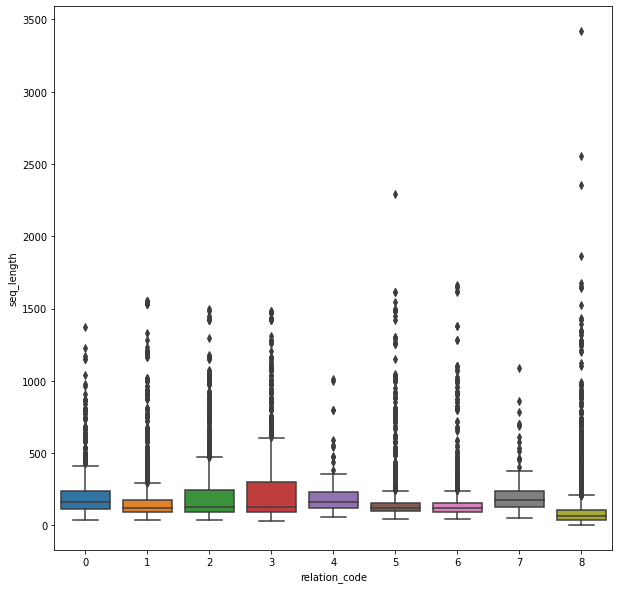

In [38]:
#Dev dataset plot
import seaborn as sns
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x = 'relation_code', y = 'seq_length' , data = dev_df)

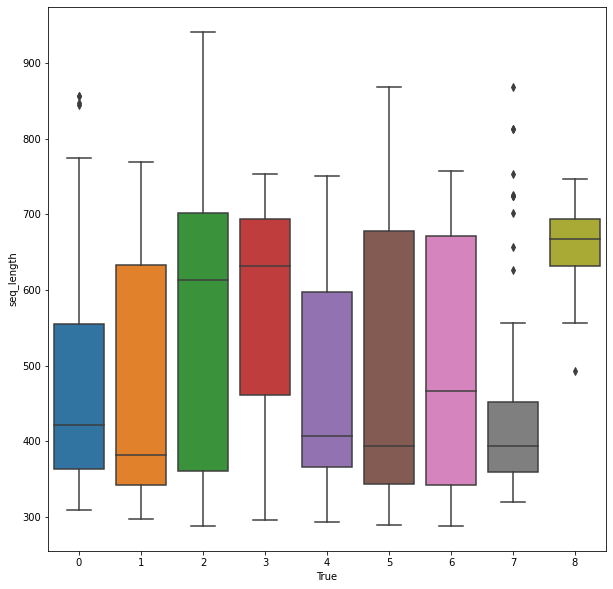

In [39]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x = 'True', y = 'seq_length' , data = misclass_m1)

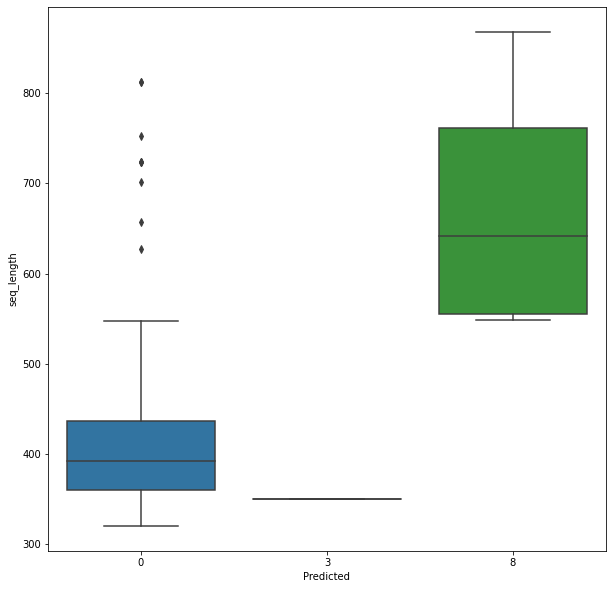

In [42]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x = 'Predicted', y = 'seq_length' , data = misclass_ade_m1)